# Stochastic Gradient Descent für MFCC

In [4]:
max_file_count = None
none_replacement = 'all'

RANDOM_STATE = 42

## MFCC Daten laden

🔗 siehe [generate.ipynb](generate.ipynb)

In [5]:
import numpy as np

feature_matrix = np.load(f'feature_{max_file_count or none_replacement}.npy')
labels = np.load(f'labels_{max_file_count or none_replacement}.npy')

# Training des SGD

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.abs(feature_matrix), labels,
                                                    test_size=0.2, random_state=RANDOM_STATE)

In [7]:
print(X_train.shape)
print(X_test.shape)

(31763, 44)
(7941, 44)


In [8]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(n_jobs=4, random_state=RANDOM_STATE)
model.fit(X_train, y_train)

SGDClassifier(n_jobs=4, random_state=42)

⚠️ `random_state` has a high influence on scores!

In [9]:
import skops.io as sio
sio.dump(model, f'sgd_{max_file_count or none_replacement}.skops')

## Leistung des Modells

In [10]:
y_test_predict = model.predict(X_test)

In [11]:
from sklearn import metrics

# proportion of correct predictions
print(f'accuracy:  {metrics.accuracy_score(y_test, y_test_predict):.4f}')

# proportion of true positives under all positives
print(f'precision: {metrics.precision_score(y_test, y_test_predict):.4f}')

# proportion of true positives under actually positives
print(f'recall:    {metrics.recall_score(y_test, y_test_predict):.4f}')

# total performance
print(f'f1:        {metrics.f1_score(y_test, y_test_predict):.4f}')

accuracy:  0.9921
precision: 0.3333
recall:    0.0161
f1:        0.0308


In [12]:
print(metrics.classification_report(y_test, y_test_predict, zero_division=0))

              precision    recall  f1-score   support

          -1       0.99      1.00      1.00      7879
           1       0.33      0.02      0.03        62

    accuracy                           0.99      7941
   macro avg       0.66      0.51      0.51      7941
weighted avg       0.99      0.99      0.99      7941



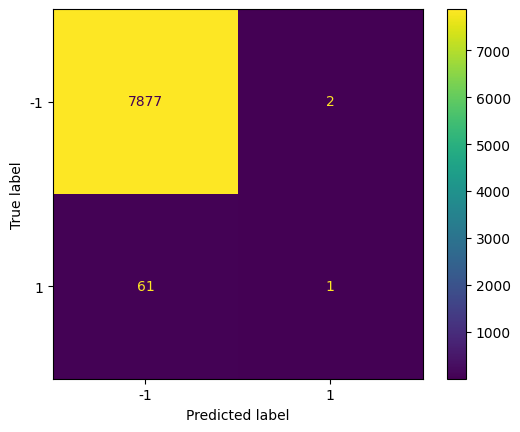

In [14]:
_ = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict)